In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import os
import time

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 15
epochs = 100
image_size = (128,128)
lr = 0.001
patience = 15

# save_dir = os.path.join(os.getcwd(), 'saved_models')
save_dir = os.path.join(os.getcwd(), 'saved_models_1556113658')
model_name = 'keras_kaggle_cnn_trained_model.h5'

In [3]:
print('Using real-time data augmentation.')


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         shear_range=0.2,
#         zoom_range=0.2,
    horizontal_flip=True,  # randomly flip images
    validation_split=0.2,
    vertical_flip=False
    )

train_generator = train_datagen.flow_from_directory(
        'train',
        shuffle=True,
        seed=42,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')


Using real-time data augmentation.
Found 2393 images belonging to 15 classes.


In [4]:
valid_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = train_datagen.flow_from_directory(
        'train',
        shuffle=False,
        seed=42,
        target_size=image_size,
        batch_size=1,
        class_mode='categorical',
        subset='validation')

Found 593 images belonging to 15 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_directory(
    directory=r"./testset/",
    target_size=image_size,
#     color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 1 images belonging to 1 classes.


i.shape=  (32, 128, 128, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


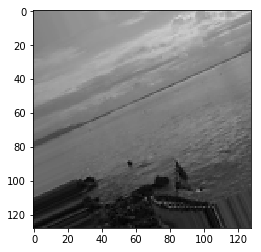

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
i,l = next(train_generator)
print('i.shape= ', i.shape)
print(l[0])
ax = plt.imshow(i[0])

In [ ]:
print(train_generator.n)

In [ ]:
print('train shape:', image_size)
print(train_generator.n, 'train samples')
print(validation_generator.n, 'test samples')
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(image_size[0], image_size[1],3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=lr)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Use ModelCheckpoint to save model and weights
if os.path.exists(save_dir):
    timestamp = 'saved_models_{:d}'.format(int(time.time()))
    print("file or directory with the name of ", save_dir, ' exists. use modified name : ', timestamp)
    save_dir = os.path.join(os.getcwd(), timestamp)
    os.makedirs(save_dir)
else:
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=patience, verbose=1)

# Fit the model on the batches generated by datagen.flow().
# model_history = model.fit_generator(datagen.flow(x_train, x_train,
#                                  batch_size=batch_size),
#                     epochs=epochs,
#                     validation_data=(x_test, y_test),
#                     workers=4,
#                     callbacks=[earlystop,checkpoint])
STEPS_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEP = validation_generator.n // validation_generator.batch_size
print('STEPS_PER_EPOCH = ', STEPS_PER_EPOCH)
print('VALIDATION_STEP = ', VALIDATION_STEP)
model_history = model.fit_generator(
                                    generator=train_generator,
                                    steps_per_epoch = STEPS_PER_EPOCH,
                                    validation_data = validation_generator, 
                                    validation_steps = VALIDATION_STEP,
                                    callbacks=[earlystop,checkpoint],
                                    workers=4,
                                    epochs = epochs
                                    )


In [6]:
model_path= '/home/jovyan/my-workspace/Kaggle_CNN/saved_models_1556113658/keras_kaggle_cnn_trained_model.h5'

In [7]:
# loading our save model
print("Loading trained model")
model = load_model(model_path)

# Score trained model.
scores = model.evaluate_generator(generator=validation_generator)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Loading trained model
Test loss: 1.1911986458389083
Test accuracy: 0.6644182124789207


In [8]:
training_dict = train_generator.class_indices
training_dict

{'CALsuburb': 0,
 'PARoffice': 1,
 'bedroom': 2,
 'coast': 3,
 'forest': 4,
 'highway': 5,
 'industrial': 6,
 'insidecity': 7,
 'kitchen': 8,
 'livingroom': 9,
 'mountain': 10,
 'opencountry': 11,
 'store': 12,
 'street': 13,
 'tallbuilding': 14}

In [9]:
import pandas as pd

test_dir='testset/'

In [28]:

from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
from matplotlib import pyplot as plt


files = [join(test_dir, f) for f in listdir(test_dir) if isfile(join(test_dir, f))]
for file in files:
    image = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    gray2RGB = image.reshape(image.shape[0]*image.shape[1],1)
    temp = np.hstack((gray2RGB,gray2RGB))
    gray2RGB = np.hstack((temp,gray2RGB))
    image = gray2RGB.reshape((image.shape[0],image.shape[1],3))
    image = expand_dims(x, axis=0)
    model.predict(image, batch_size=1)
    

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (256, 256, 3)

In [ ]:
solution = pd.DataFrame({"ID":id, "class":predicted_class})
solution.to_csv("pokemon_sol.csv", index = False)